# Project Methodology

### The project consists of the following sections:

1. Data Collection and Ingestion
2. Exploratory Data Analysis and Data Cleaning
3. Feature Engineering
4. Splitting the data in training and testing sets (Model Training)
5. Model Evaluation and Selection
* Algorithm selected: Random Forest, because Random Forest can yield good results with less data, so it's one of the best classification models for churn prediction. Also, our model is more accurate for Random Forest.

7. Web app deployment


# Data Collection and Ingestion:



In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# read data into Dataframe

import pandas as pd 
df_telco = pd.read_excel('Telco_customer_churn_merged.xlsx')

In [62]:
# visualize column names

df_telco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [63]:
# view few observations of the data

df_telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices


In [64]:
# dimensions of the dataframe

df_telco.shape

(14086, 33)

In [65]:
# check unique values of each column

for column in df_telco.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telco[column].unique()))

Column: CustomerID - Unique Values: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Column: Count - Unique Values: [ 1. nan]
Column: Country - Unique Values: ['United States' nan]
Column: State - Unique Values: ['California' nan]
Column: City - Unique Values: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' nan]
Column: Zip Code - Unique Values: [90003. 90005. 90006. ... 96134. 96146.    nan]
Column: Lat Long - Unique Values: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401' nan]
Column: Latitude - Unique Values: [33.964131 34.059281 34.048013 ... 41.813521 39.191797       nan]
Column: Longitude - Unique Values: [-118.272783 -118.30742  -118.293953 ... -121.492666 -120.212401
         nan]
Column: Gender - Unique Values: ['Male' 'Female']
Column: Senior Citizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['No' 'Yes']
Column: D

Dataset contains several independent variables, which can be classified into 3 groups:

(1) Demographic Information

* Gender: Whether the client is a female or a male (Female, Male).
* Senior Citizen: Whether the client is a senior citizen or not ( 0, 1)
* Partner: Whether the client has a partner or not (Yes, No).
* Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

* Tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
* Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
* Paperless Billing: Whether the client has paperless billing or not (Yes, No).
* Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
* Montly Charges: The amount charged to the customer monthly (Multiple different numeric values).
* Total Charges: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information

* Phone Service: Whether the client has a phone service or not (Yes, No).
* Multiple Lines: Whether the client has multiple lines or not (No phone service, No, Yes).
* Internet Services: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
* Online Security: Whether the client has online security or not (No internet service, No, Yes).
* Online Backup: Whether the client has online backup or not (No internet service, No, Yes).
* Device Protection: Whether the client has device protection or not (No internet service, No, Yes).
* Tech Support: Whether the client has tech support or not (No internet service, No, Yes).
* Streaming TV: Whether the client has streaming TV or not (No internet service, No, Yes).
* Streaming Movies: Whether the client has streaming movies or not (No internet service, No, Yes).

# Exploratory Data Analysis and Data Cleaning:

In [66]:
# summary of the data frame

df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         14086 non-null  object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             14086 non-null  object 
 10  Senior Citizen     14086 non-null  int64  
 11  Partner            14086 non-null  object 
 12  Dependents         14086 non-null  object 
 13  Tenure Months      14086 non-null  int64  
 14  Phone Service      14086 non-null  object 
 15  Multiple Lines     14086 non-null  object 
 16  Internet Service   140

In [67]:
# summary statistics of the data

df_telco.describe()

,Count,Zip Code,Latitude,Longitude,Senior Citizen,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,14086.000000,14086.000000,14086.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,0.162147,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,0.368599,24.558609,30.088979,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,0.000000,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,0.000000,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,0.000000,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,1.000000,72.000000,118.750000,1.000000,100.000000,6500.000000


In [68]:
# create function to generate report of the data

def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [69]:
# show unique samples of the data

report(df_telco)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,float64,"[1.0, nan]",1
2,Country,object,"[United States, nan]",1
3,State,object,"[California, nan]",1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,float64,"[90003.0, 90005.0, 90006.0, 90010.0, 90015.0]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


We have made a brief report on this data. From this report we will determine which columns to delete.

From the dataframe above, there are several columns which have only one unique value, namely the columns: Count, Country, State hence we will remove those. In addition, we will not use the CustmerID column as it does not determine the probability of the model of churn prediction in any way. Zip code, Lat Long, Latitude, Longitude columns will also be deleted. We will not use it to build Machine Learning. We will also delete Churn Reason column because further while removing null values, observations for "Churn Label: No" will be removed and hence we won't be able to visualize the data grouped by class. We will use it separately in different dataframe just for looking some insights.

In [70]:
# drop columns which does not determine the probability of the model

df_telco.drop(["CustomerID","Count", "Country","State","City","Zip Code","Lat Long","Latitude","Longitude","Churn Score","CLTV","Churn Reason"], axis = 1, inplace=True)

In [71]:
# summary of the data after dropping few columns

df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             14086 non-null  object 
 1   Senior Citizen     14086 non-null  int64  
 2   Partner            14086 non-null  object 
 3   Dependents         14086 non-null  object 
 4   Tenure Months      14086 non-null  int64  
 5   Phone Service      14086 non-null  object 
 6   Multiple Lines     14086 non-null  object 
 7   Internet Service   14086 non-null  object 
 8   Online Security    14086 non-null  object 
 9   Online Backup      14086 non-null  object 
 10  Device Protection  14086 non-null  object 
 11  Tech Support       14086 non-null  object 
 12  Streaming TV       14086 non-null  object 
 13  Streaming Movies   14086 non-null  object 
 14  Contract           14086 non-null  object 
 15  Paperless Billing  14086 non-null  object 
 16  Payment Method     140

The Dataset now contains 14,086 observations and 21 columns. Apparently, there are no null values in the dataset; however column "Total Charges" was wrongly detected as an object. It represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type.

In [72]:
# transform the column TotalCharges into a numeric data type

df_telco['Total Charges'] = pd.to_numeric(df_telco['Total Charges'], errors='coerce')

# null observations of the TotalCharges column

df_telco[df_telco['Total Charges'].isnull()]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
2234,Female,0,Yes,No,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0.0
2438,Male,0,No,No,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0.0
2568,Female,0,Yes,No,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0.0
2667,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0.0
2856,Female,0,Yes,No,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0.0
4331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0.0
4687,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0.0
5104,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0.0
5719,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0.0
6772,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0.0


In [73]:
# replace white space from column names first

df_telco.columns = df_telco.columns.str.strip().str.replace(' ', '_')

In [74]:
# summary of data after removing white space from column names

df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             14086 non-null  object 
 1   Senior_Citizen     14086 non-null  int64  
 2   Partner            14086 non-null  object 
 3   Dependents         14086 non-null  object 
 4   Tenure_Months      14086 non-null  int64  
 5   Phone_Service      14086 non-null  object 
 6   Multiple_Lines     14086 non-null  object 
 7   Internet_Service   14086 non-null  object 
 8   Online_Security    14086 non-null  object 
 9   Online_Backup      14086 non-null  object 
 10  Device_Protection  14086 non-null  object 
 11  Tech_Support       14086 non-null  object 
 12  Streaming_TV       14086 non-null  object 
 13  Streaming_Movies   14086 non-null  object 
 14  Contract           14086 non-null  object 
 15  Paperless_Billing  14086 non-null  object 
 16  Payment_Method     140

As we can take a look at the dataset further, some values for payment method attribute contain further categorization in parenthesis. These values are too long to be used as labels in further visualizations and removing it will not affect our analysis hence we remove this clarification in parenthesis from the entries of the Payment Method column.

In [75]:
# unique elements of the PaymentMethod column

df_telco.Payment_Method.unique()

# remove (automatic) from payment method names

df_telco['Payment_Method'] = df_telco['Payment_Method'].str.replace(' (automatic)', '', regex=False)

In [76]:
# unique elements of the PaymentMethod column after the modification 

df_telco.Payment_Method.unique()

array(['Mailed check', 'Electronic check', 'Bank transfer', 'Credit card'],
      dtype=object)

Now to replace all the NA values and fix data types of wrongly assigned variables.

In [77]:
import numpy as np

# remove null and Nan values from data

df_telco.replace([np.inf, -np.inf], inplace=True)
df_telco.replace([np.nan, 0], inplace=True)
df_telco.fillna(999, inplace=True)

df_telco['Total_Charges'].replace(' ', 0, inplace=True)

In [78]:
# change Monthly Charges and Total Charges data type to float for model

df_telco = df_telco.astype({'Monthly_Charges':'float','Total_Charges':'float'})

Checking for the correlation between Monthly and Total Charges

<AxesSubplot: xlabel='Monthly_Charges', ylabel='Total_Charges'>

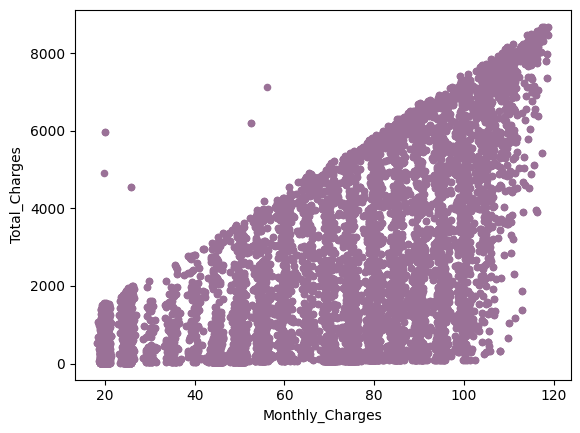

In [79]:
df_telco[['Monthly_Charges', 'Total_Charges']].corr()
df_telco[['Monthly_Charges', 'Total_Charges']].plot.scatter(x = 'Monthly_Charges', y='Total_Charges', color = '#9A7197')

We can see that there is a high correlation between monthly charges and total charges. We can do PCA in these two columns. PCA is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model.

### Data Visualization



Response Variable:

The following pie chart shows the percentage of observations that correspond to each class of the response variable: no and yes. As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (73.5%). When modeling, this imbalance will lead to a large number of false negatives, as we will see later.

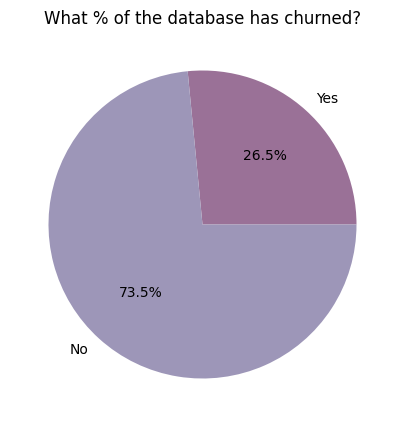

In [80]:
# chart to show proportions of response variable

from matplotlib import pyplot as plt
import seaborn as sns

colors = ['#9A7197','#9D96B8']

# proportion of observation of each class

plt.figure(figsize=(10,5))
plt.title('What % of the database has churned?', fontsize = 12)
plt.pie(df_telco['Churn_Label'].value_counts(sort = False),labels = list(df_telco['Churn_Label'].unique()), colors = colors, autopct='%.1f%%')
plt.show()

Demographic Information:

The following code creates a stacked percentage bar chart for each demographic attribute (gender, Senior Citizen, Partner, Dependents), showing the percentage of Churn for each category of the attribute.

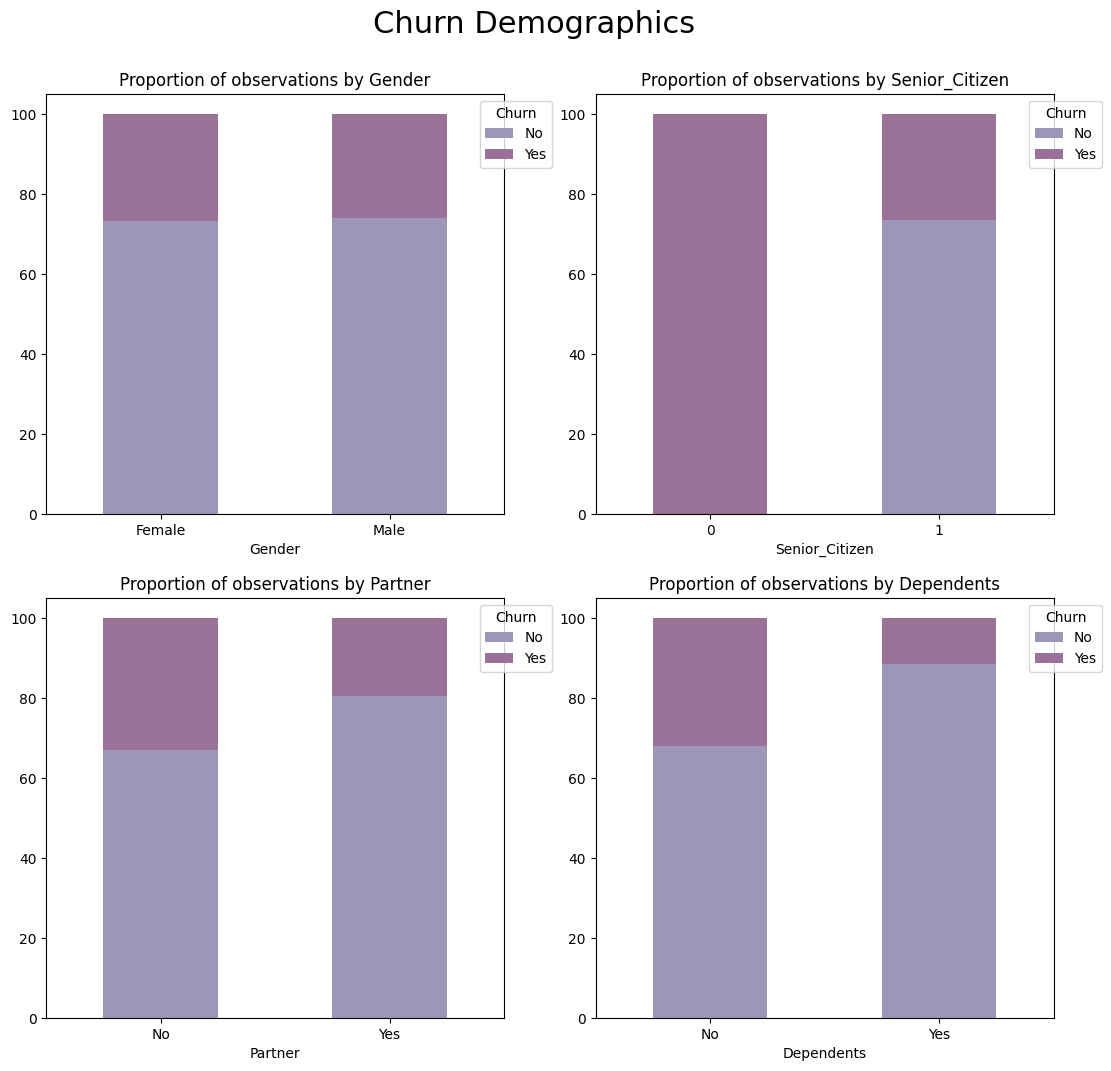

In [81]:
# chart to show proportions of observations by demographic information

import math

def percentage_stacked_plot(columns_to_plot, super_title):
     
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure

    fig = plt.figure(figsize=(13, 6 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot

    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot

        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot

        prop_by_independent = pd.crosstab(df_telco[column], df_telco['Churn_Label']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['#9D96B8','#9A7197'])

        # set the legend in the upper right corner

        ax.legend(loc = "upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title = 'Churn', fancybox = True)

        # set title and labels

        ax.set_title('Proportion of observations by ' + column, fontsize = 12)

        ax.tick_params(rotation = 'auto')


# demographic column names

demographic_columns = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents']

# stacked plot of demographic columns

percentage_stacked_plot(demographic_columns, 'Churn Demographics')

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).

We can extract the following conclusions by analyzing demographic attributes:



*   The churn rate of senior citizens is almost double that of young citizens.
*   We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
*   Customers with a partner churn less than customers with no partner.


Customer Account Information — Categorical variables:

As we did with demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes (Contract, Paperless Billing, Payment Method).


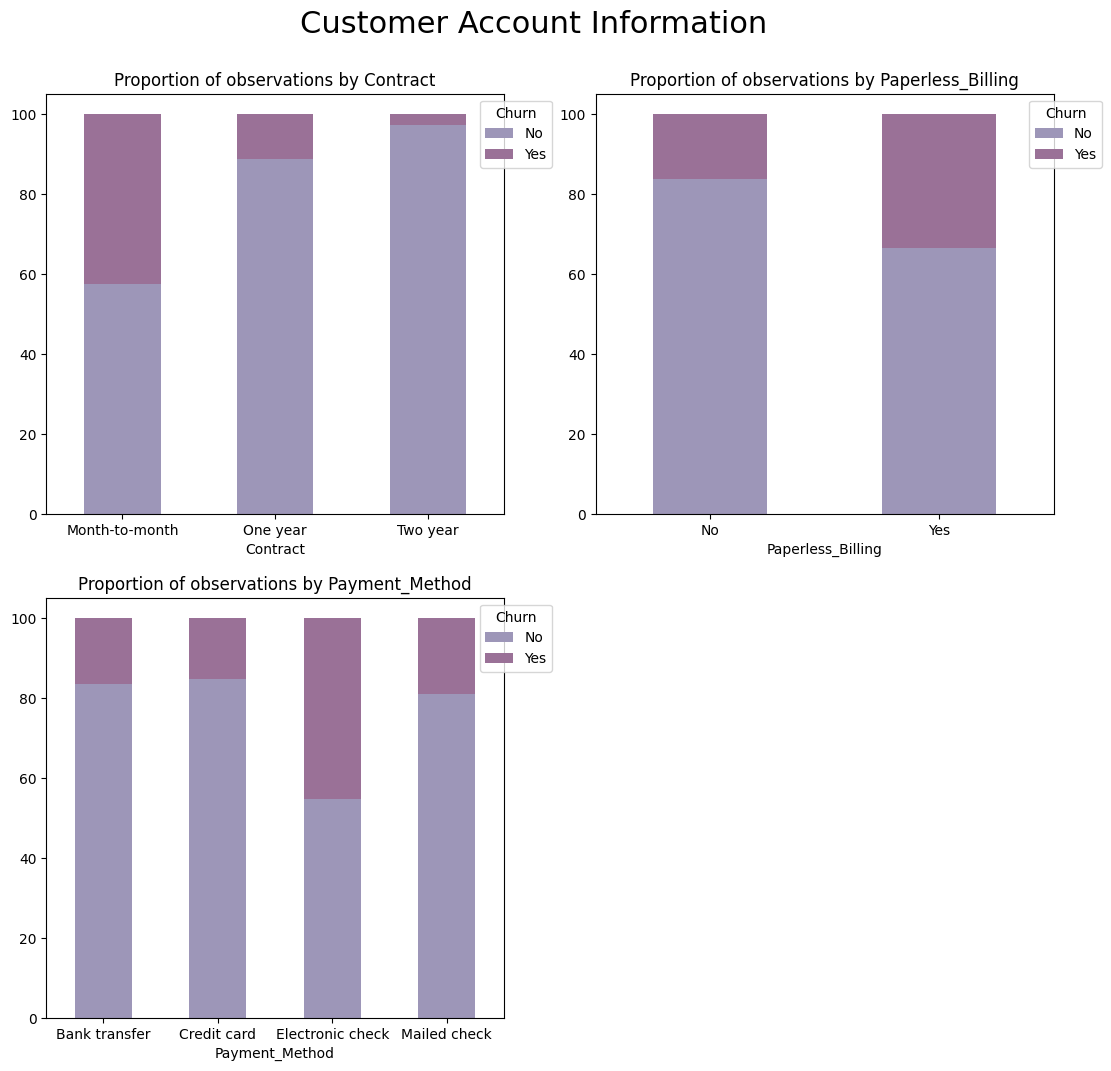

In [82]:
# chart to show proportions of observations by customer account information

# customer account column names

account_columns = ['Contract', 'Paperless_Billing', 'Payment_Method']

# stacked plot of customer account columns

percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:



*   Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
*   Customers who opted for an electronic check as paying method are more likely to leave the company.
*   Customers subscribed to paperless billing churn more than those who are not subscribed.


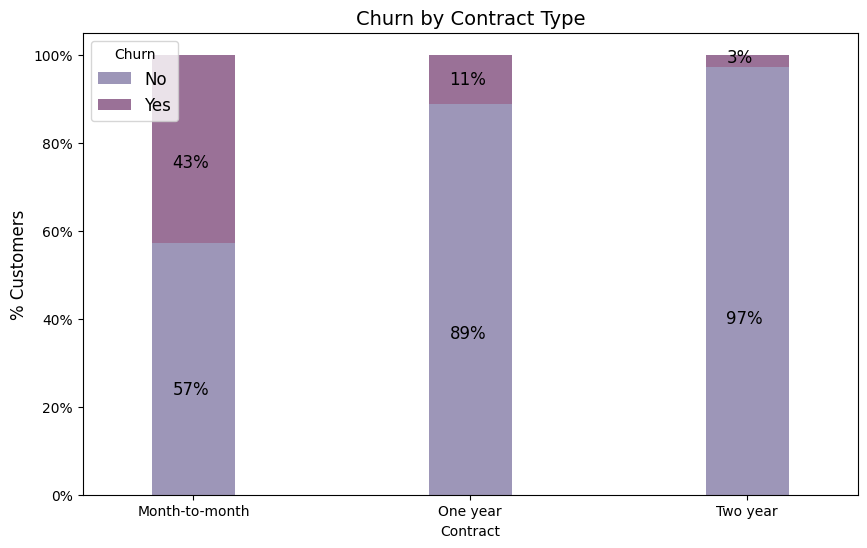

In [83]:
# chart to show churn proportions by Contract type

import matplotlib.ticker as mtick

colors = ['#9D96B8', '#9A7197']
contract_churn = df_telco.groupby(['Contract','Churn_Label']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot (kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'best', prop = {'size':12}, title = 'Churn')
ax.set_ylabel('% Customers', size = 12)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'black', size = 12)

We can extract the following conclusions by analyzing the histograms above:



*   The churn rate tends to be larger when monthly charges are high.
*   New customers (low tenure) are more likely to churn.
*   Clients with high total charges are less likely to leave the company.



Services Information:

Lastly, we evaluate the percentage of the target for each category of the services columns with stacked bar plots.

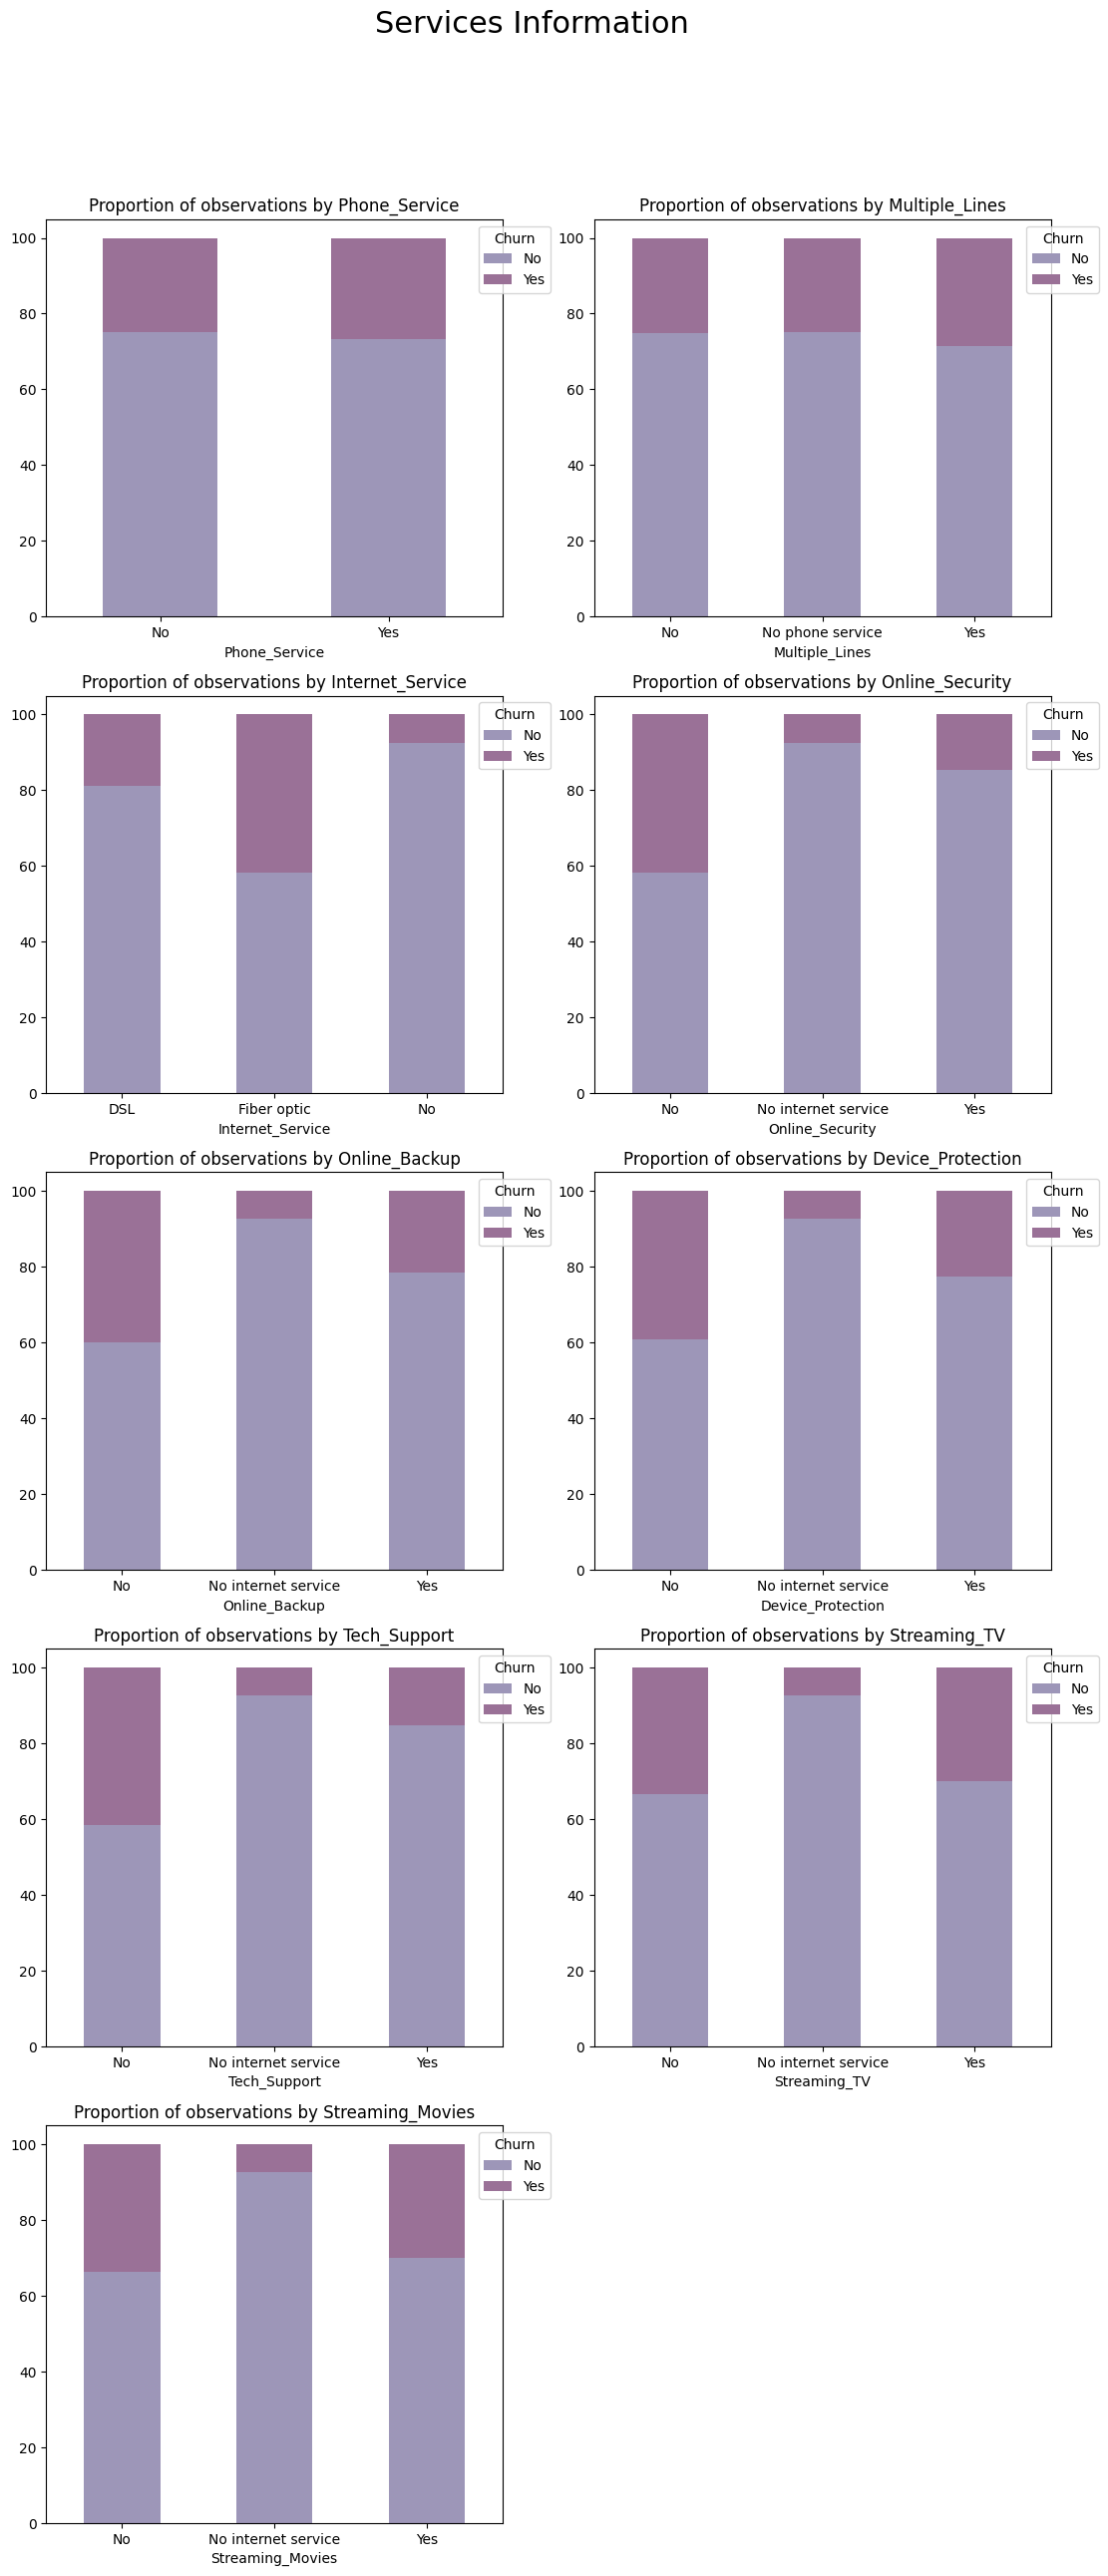

In [84]:
# chart to show proportions of observations by services information

# services column names

services_columns = ['Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security',
                   'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']

# stacked plot of services columns

percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:



*   We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
*   Clients with online security churn less than those without it.
*   Customers with no tech support tend to churn more often than those with tech support.

By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

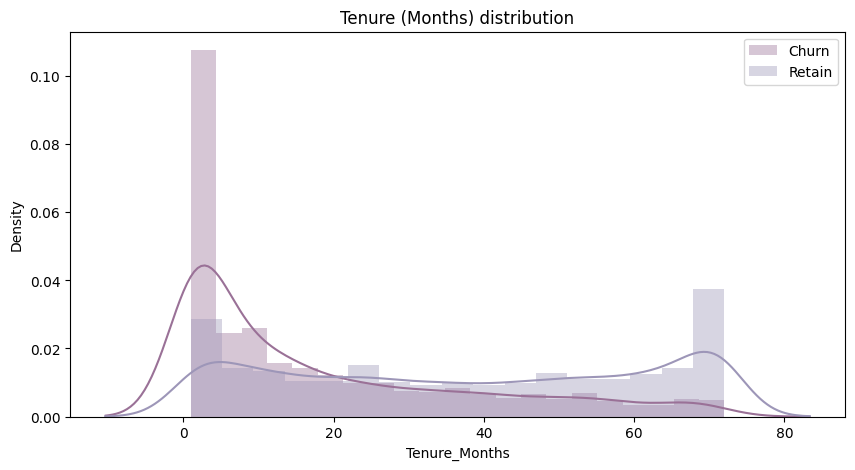

In [85]:
# chart to show Tenur months distribution

plt.figure(figsize = (10,5))
plt.title('Tenure (Months) distribution')
sns.distplot(df_telco[df_telco['Churn_Label'] == 'Yes']['Tenure_Months'], label = 'Churn', color = '#9A7197')
sns.distplot(df_telco[df_telco['Churn_Label'] == 'No']['Tenure_Months'], label = 'Retain', color = '#9D96B8')
plt.legend(loc= 'upper right')
plt.show()

From the visualization above, we can see that, the longer a person uses the provider, the probability of churn decreases.

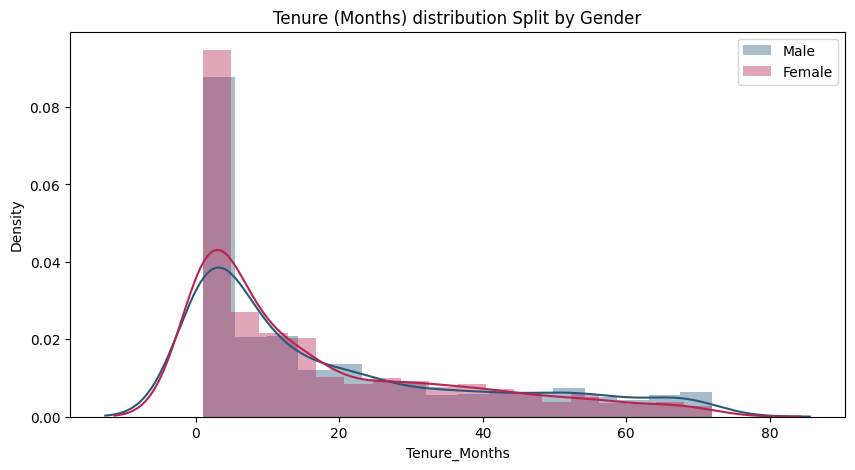

In [86]:
# chart to show Tenure months distribution split by gender

plt.figure(figsize=(10,5))
plt.title('Tenure (Months) distribution Split by Gender')
sns.distplot(df_telco[(df_telco['Churn_Label'] == 'Yes') & (df_telco['Gender'] == 'Male')]['Tenure_Months'], label='Male', color = '#28587B')
sns.distplot(df_telco[(df_telco['Churn_Label'] == 'Yes') & (df_telco['Gender'] == 'Female')]['Tenure_Months'], label='Female', color = '#B6244F')
plt.legend()
plt.show()

From the visualization above, most female users whose subscription period is less than 10 months, will be more likely to churn than male. However, the longer the subscription period, male are more likely to churn than female.

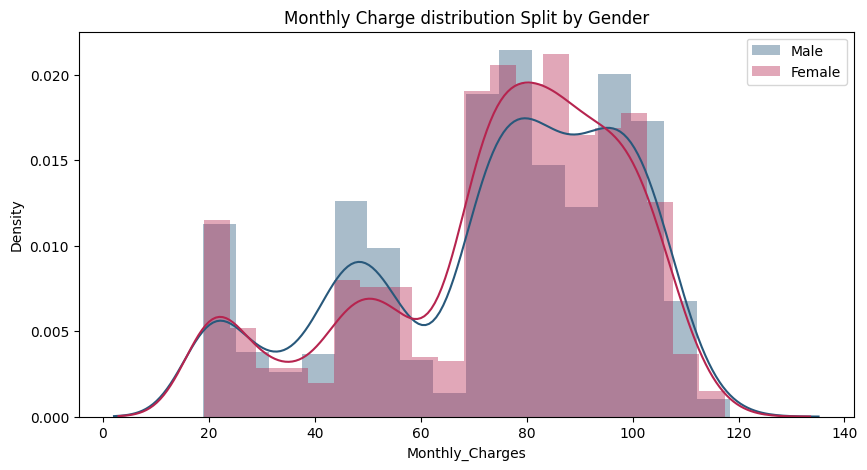

In [87]:
# chart to show Monthly charge distribution split by gender

plt.figure(figsize=(10,5))
plt.title('Monthly Charge distribution Split by Gender')
sns.distplot(df_telco[(df_telco['Churn_Label'] == 'Yes') & (df_telco['Gender'] == 'Male')]['Monthly_Charges'], label='Male', color = '#28587B')
sns.distplot(df_telco[(df_telco['Churn_Label'] == 'Yes') & (df_telco['Gender'] == 'Female')]['Monthly_Charges'], label='Female', color = '#B6244F')
plt.legend()
plt.show()

Observations from visualizations above:

* Monthly contract and Tenure could potentially be the most important predictor variables to predict churn.
* The odds between men and women to churn is almost the same in every level of monthly charges.

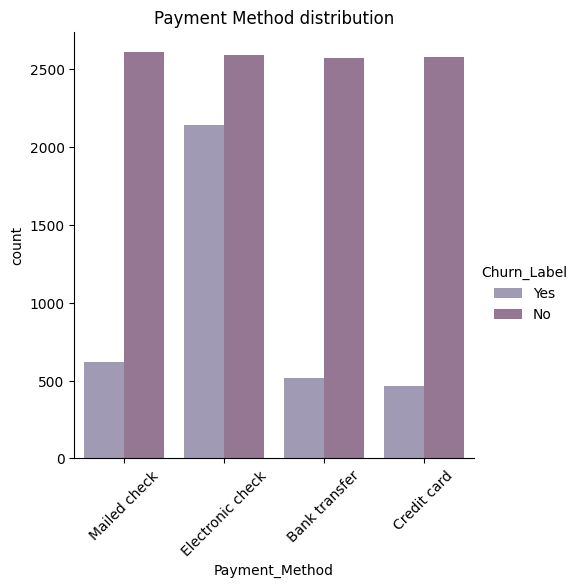

In [116]:
# chart to show Payment method distribution

sns.catplot(x='Payment_Method', hue='Churn_Label', kind='count', data=df_telco,palette=sns.color_palette(['#9D96B8', '#9A7197']))
plt.xticks(rotation=45)
plt.title('Payment Method distribution')
plt.show()

From above visualization, we can see that from the customers who are likely to churn are using electronic check payment methods. This visualization does not say a lot about customer's payment method behaviour towards churn but while training the model we can use this feature with the combination of others to check the prediction rate.

# Feature Engineering:



Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process. The techniques implemented in this project are described in more detail below.

In [89]:
# check if any columns still have null values

df_telco.loc[:, df_telco.isna().any()]

# dropping Senior Citizen and Churn Value columns which does not determine model prediction

df_telco = df_telco.drop(['Senior_Citizen' ,'Churn_Value'], axis=1)
df_telco.loc[:, df_telco.isna().any()]

""
0
1
2
3
4
...
14081
14082
14083
14084


In [90]:
# summary of the data after dropping columns

summary_df_telco = report(df_telco)
one_hot_cols = summary_df_telco[summary_df_telco['d_type']=='object']['Column']

In [91]:
summary_df_telco

,Column,d_type,unique_sample,n_uniques
0,Gender,object,"[Male, Female]",2
1,Partner,object,"[No, Yes]",2
2,Dependents,object,"[No, Yes]",2
3,Tenure_Months,int64,"[2, 8, 28, 49, 10]",72
4,Phone_Service,object,"[Yes, No]",2
5,Multiple_Lines,object,"[No, Yes, No phone service]",3
6,Internet_Service,object,"[DSL, Fiber optic, No]",3
7,Online_Security,object,"[Yes, No, No internet service]",3
8,Online_Backup,object,"[Yes, No, No internet service]",3
9,Device_Protection,object,"[No, Yes, No internet service]",3


No modification:

The SeniorCitizen column is already a binary column and should not be modified.

Label Encoding:

Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding with the following binary variables: (1) Gender, (2) Partner, (3) Dependents, (4)Paperless_Billing, (5)Phone_Service , and (6)Churn_Label .

In [92]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             14086 non-null  object 
 1   Partner            14086 non-null  object 
 2   Dependents         14086 non-null  object 
 3   Tenure_Months      14086 non-null  int64  
 4   Phone_Service      14086 non-null  object 
 5   Multiple_Lines     14086 non-null  object 
 6   Internet_Service   14086 non-null  object 
 7   Online_Security    14086 non-null  object 
 8   Online_Backup      14086 non-null  object 
 9   Device_Protection  14086 non-null  object 
 10  Tech_Support       14086 non-null  object 
 11  Streaming_TV       14086 non-null  object 
 12  Streaming_Movies   14086 non-null  object 
 13  Contract           14086 non-null  object 
 14  Paperless_Billing  14086 non-null  object 
 15  Payment_Method     14086 non-null  object 
 16  Monthly_Charges    140

In [93]:
# encode the columns for model fitting

df_telco_transformed = df_telco.copy()

# label encoding (binary variables)

label_encoding_columns = ['Gender', 'Partner', 'Dependents', 'Paperless_Billing', 'Phone_Service', 'Churn_Label']

# encode categorical binary features using label encoding

for column in label_encoding_columns:
    if column == 'Gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

One-Hot Encoding:

One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data. In this project, we apply one-hot encoding to the following categorical variables: (1) Contract, (2) Payment_Method, (3) Multiple_Lines, (4) Internet_Services, (5) Online_Security, (6) Online_Backup, (7) Device_Protection, (8) Tech_Support, (9) Streaming_TV, and (10)Streaming_Movies.

In [94]:
# one-hot encoding (categorical variables with more than two levels)

one_hot_encoding_columns = ['Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 
                            'Tech_Support', 'Streaming_TV',  'Streaming_Movies', 'Contract', 'Payment_Method']

# encode categorical variables with more than two levels using one-hot encoding

df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

In [95]:
# report of the data after label encoding of columns

report(df_telco_transformed)

,Column,d_type,unique_sample,n_uniques
0,Gender,int64,"[0, 1]",2
1,Partner,int64,"[0, 1]",2
2,Dependents,int64,"[0, 1]",2
3,Tenure_Months,int64,"[2, 8, 28, 49, 10]",72
4,Phone_Service,int64,"[1, 0]",2
5,Paperless_Billing,int64,"[1, 0]",2
6,Monthly_Charges,float64,"[53.85, 70.7, 99.65, 104.8, 103.7]",1585
7,Total_Charges,float64,"[108.15, 151.65, 820.5, 3046.05, 5036.3]",6530
8,Churn_Label,int64,"[1, 0]",2
9,Multiple_Lines_No,uint8,"[1, 0]",2


The main drawback of this encoding is the significant increase in the dimensionality of the dataset (curse of dimensionality); therefore, this method should be avoided when the categorical column has a large number of unique values.

Normalization:

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process; however, it does not mean those variables are more important to predict the target. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.


There are multiple normalization techniques in statistics. In this project, we will use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [96]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_telco_transformed['Tenure_Months'] = sc.fit_transform(df_telco_transformed[['Tenure_Months']])
df_telco_transformed['Monthly_Charges'] = sc.fit_transform(df_telco_transformed[['Monthly_Charges']])
df_telco_transformed['Total_Charges'] = sc.fit_transform(df_telco_transformed[['Total_Charges']])

### Modeling:

For the modeling stage, this churn prediction will focus on as much as possible in predicting which customers will churn. As we know, if this model predicts 'retain' for a customer that will actually 'churn', then we will lose the customer. And according to some opinions, the cost of customer acquisition is 5 times greater than the cost of retaining the customer.

So that in modeling this time we will focus on recall. And we will try to use PR (Precision Recall) Curve to find the optimal threshold.

Setting a baseline:

In machine learning, we often use a simple classifier called baseline to evaluate the performance of a model. In this classification problem, the rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

Splitting the data in training and testing sets:

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. The training set is used by the machine learning algorithm to build the model. The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. It is important to assess the quality of the model using unseen data to guarantee an objective evaluation.

First, we create a variable X to store the independent attributes of the dataset. Additionally, we create a variable y to store only the target variable (Churn_Label).

Then, we can use the train_test_split function from the sklearn.model_selection package to create both the training and testing sets.

In [97]:
# Import Machine learning algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Import metric for performance evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets

from sklearn.model_selection import train_test_split
X = df_telco_transformed.drop('Churn_Label', axis = 1)
y = df_telco_transformed['Churn_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [99]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average = 'weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

Assessing multiple algorithms:

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

In this project, we compare 9 different algorithms -

*   Dummy classifier (baseline) - Gives you a measure of "baseline" performance i.e. the success rate one should expect to achieve even if simply guessing.

*   K Nearest Neighbours Classification
*   Logistic Regression
*   SVC Classifier
*   Random Forest Classifier
*   Decision Tree Classifier
*   Naive Bayes Classifier
*   Gradient Boosting Classifier
*   AdaBoost Classifier
*   XGBoost Classifier


As shown below, all models outperform the dummy classifier model in terms of prediction accuracy. Therefore, we can affirm that machine learning is applicable to our problem because we observe an improvement over the baseline.

In [100]:
# Running Dummy Classifier

dummy_model = modeling(DummyClassifier, 'Dummy Classifier')

Dummy Classifier
accuracy:  0.7453151618398637
precision:  0.0
recall:  0.0
f1_score:  0.6365551650657694


In [101]:
# Running K-Neighbors Classifier

kn_model = modeling(KNeighborsClassifier, 'KNeighbors Classifier')

KNeighbors Classifier
accuracy:  0.8100511073253833
precision:  0.6304347826086957
recall:  0.6142697881828316
f1_score:  0.8092319366148208


In [102]:
# Running Logistic Regression

log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.8063600227143668
precision:  0.634207240948814
recall:  0.5663322185061316
f1_score:  0.8026247316430042


In [103]:
# Running Support Vector Classifier

svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8089153889835321
precision:  0.6513513513513514
recall:  0.5373467112597548
f1_score:  0.8025264068955299


In [104]:
# Running Random Forest Classifier

rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.9335604770017035
precision:  0.8970059880239521
recall:  0.835005574136009
f1_score:  0.9327590475980666


In [105]:
# Running Decision Tree Classifier

dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.9275979557069847
precision:  0.8590604026845637
recall:  0.8561872909698997
f1_score:  0.9275579919633119


In [106]:
# Running Naive Bayes Classifier

nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.69534355479841
precision:  0.44823529411764707
recall:  0.8494983277591973
f1_score:  0.7149378013888835


In [107]:
# Running Gradient Boosting Classifier 

gb_model = modeling(GradientBoostingClassifier, "Gradient Boosting Classifier")  

Gradient Boosting Classifier
accuracy:  0.814877910278251
precision:  0.6618229854689565
recall:  0.5585284280936454
f1_score:  0.8094474219916852


In [108]:
# Running Ada Boost Classifier

ada_model = modeling(AdaBoostClassifier, "Ada Boost Classifier")  

Ada Boost Classifier
accuracy:  0.8091993185689949
precision:  0.6429479034307497
recall:  0.5641025641025641
f1_score:  0.8049255476774919


In [109]:
# Running XGBoost Classifier

xgb_model = modeling(XGBClassifier, "XGB Classifier")  

XGB Classifier
accuracy:  0.8659852356615559
precision:  0.766624843161857
recall:  0.6811594202898551
f1_score:  0.8632821385380007


In [110]:
# Saving best model: method 1

import joblib

# Sava the model to disk

filename = 'model.sav'
joblib.dump(rf_model, filename)

['model.sav']

In [111]:
# Saving best model: method 2

import pickle

pickle.dump(rf_model, open('model.pkl','wb'))

In [112]:
# Loading model to compare the results

model = pickle.load( open('model.pkl','rb'))

model.predict([[1,0,0,0.154929577464788,0,0,0.421890547263681,0.0836025848142165,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0]])

array([0], dtype=int64)

In [113]:
model.predict_proba([[1,0,0,0.154929577464788,0,0,0.421890547263681,0.0836025848142165,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0]])

array([[0.89, 0.11]])

In [114]:
model.predict([[1,0,0,0.929577464788732,1,1,0.842786069651741,0.792459035310408,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0]])

array([1], dtype=int64)

In [115]:
model.predict_proba([[1,0,0,0.929577464788732,1,1,0.842786069651741,0.792459035310408,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0]])

array([[0.1, 0.9]])